## Regular Expressions

Regular Expressions (RegEx for short) are an immensely powerful tool for parsing strings.
However, it’s many rules make RegEx very confusing, even for veteran users, so please don’t
hesitate to ask questions! Here’s a snippet of the RegEx portion of the Fall 2023 Midterm

Reference Sheet:

![Regex Reference](images/regex_reference.png)

### **(a)** 

Which string contains a match for the following regular expression, "$\texttt{1+1\$}$"?

* $\texttt{What is 1+1}$
* $\texttt{Make a wish at 11:11}$
* $\texttt{111 Ways to Succeed}$

<details>
<summary><b>Answer</b></summary>

* $\texttt{Make a wish at 11:11}$

Note that there are two operators here, the + and the \$. The \$ operator states that our match must occur at the end of the string, so that already rules out the third option. Furthermore, the + operator indicates that we need "one or more 1s" which is followed by another 1 (so two or more 1s in total). The only string ending with two or more consecutive 1s is the second option.

</details>

### **(b)** 

Write a regular expression that matches a string which contains only one word containing
only lowercase letters and numbers (including the empty string).

<details>
<summary><b>Answer</b></summary>

$\texttt{\^{}[a-z0-9]*\$}$

* $\texttt{[a-z0-9]}$ to indicate that the word only include lowercase letters and/or numbers
* $\texttt{*}$ operator to state that the word can contain "0 or more" of $\texttt{[a-z0-9]}$. Note that we also want to match empty strings, which is why $\texttt{*}$ is preferred over $\texttt{+}$ here.
* $\texttt{\^{}}$ and $\texttt{\$}$ to indicate that the pattern must match the string at the beginning of the string, and at the end of the string respectively. This ensures that the pattern only matches strings with one word (not two or more words).

</details>

### **(c)** 

Given $\texttt{sometext = "I've got 10 eggs, 20 gooses, and 30 giants."}$, use $\texttt{re.findall}$ to extract all items and quantities from the string. The result should
look like $\texttt{["10 eggs", "20 gooses", "30 giants"]}$. You may assume that
a space separates quantity and type, and that each item ends in s.

<details>
<summary><b>Answer</b></summary>

$\texttt{re.findall(r"\\d+\\s\\w+", sometext)}$

The strings we want to match begin with a number, followed by a space, followed by a word. We can use this to construct our pattern.

* $\texttt{\\d+}$ to match one or more digits
* $\texttt{\\s}$ to match a *single* space
* $\texttt{\\w+}$ to match one or more word characters $\texttt{[A-Za-z0-9\_]}$

</details>

### **(d)** 

For each pattern specify the starting and ending position of the first match in the string.
The index starts at zero and we are using closed intervals (both endpoints are included).

|   | $\texttt{abcdefg}$ | $\texttt{abcs!}$ | $\texttt{ab abc}$ | $\texttt{abc, 123}$ |
| :-: | :-: | :-: | :-: | :-: |
| $\texttt{abc*}$ | [0,2] | | | |
| $\texttt{[ \^{} \\s]+}$ | | | | |
| $\texttt{ab.*c}$ | | | | |
| $\texttt{[a-z1,9]+}$ | | | | |

<br>

<details>
<summary><b>Answer</b></summary>

|   | $\texttt{abcdefg}$ | $\texttt{abcs!}$ | $\texttt{ab abc}$ | $\texttt{abc, 123}$ |
| :-: | :-: | :-: | :-: | :-: |
| $\texttt{abc*}$ | [0,2] | [0,2] | [0,1] | [0,2] |
| $\texttt{[ \^{} \\s]+}$ | [0,6] | [0,4] | [0,1] | [0,3] |
| $\texttt{ab.*c}$ | [0,2] | [0,2] | [0,5] | [0,2] |
| $\texttt{[a-z1,9]+}$ | [0,6] | [0,3] | [0,1] | [0,3] |

</details>

## Visualizing Bigfoot

Many of you have probably heard of Bigfoot before. It's a mysterious ape-like creature that is said to live in North American forests. Most doubt its existence, but a passionate few swear that Bigfoot is real. In this discussion, you will be working with a dataset on Bigfoot sightings, visualizing variable distributions and combinations thereof to better understand how/when/where Bigfoot is reportedly spotted, and possibly either confirm or cast doubt on its existence. The Bigfoot data contains a ton of variables about each reported Bigfoot spotting, including location information, weather, and moon phase.

In [5]:
# Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading bigfoot data

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-13/bigfoot.csv'
df = pd.read_csv(url)

This dataset is extremely messy, with observations missing many values across multiple columns. This is normally the case with data based on citizen reports (many do not fill out all required fields). For the purposes of this discussion, we will drop all observations with any missing values and some unneeded columns. However, note this is not a good practice and you should almost never do this in real life!

In [7]:
# Drop unneeded rows and observations with missing values

bigfoot = df.dropna().rename({'temperature_high':'temp_high' ,'temperature_low':'temp_low'},axis = 1)
bigfoot = bigfoot.drop(['observed', 'location_details', 'county', 'state', 'title',
       'latitude', 'longitude', 'number', 'classification', 'geohash',
       'temperature_mid', 'dew_point','precip_probability', 'precip_type','summary', 
       'wind_bearing'], axis = 1)

Here are the first few entries of the `bigfoot` table:

In [8]:
bigfoot.head(5)

,season,date,temp_high,temp_low,humidity,cloud_cover,moon_phase,precip_intensity,pressure,uv_index,visibility,wind_speed
10,Summer,2016-06-07,74.69,53.80,0.79,0.61,0.10,0.0010,998.87,6.0,9.70,0.49
21,Summer,2015-10-02,49.06,44.24,0.87,0.93,0.67,0.0092,1022.92,3.0,9.16,2.87
32,Fall,2009-10-31,69.01,34.42,0.77,0.81,0.42,0.0158,1011.48,3.0,1.97,3.94
34,Summer,1978-07-15,68.56,63.05,0.88,0.80,0.33,0.0285,1014.70,5.0,5.71,5.47
55,Summer,2015-11-26,20.49,5.35,0.65,0.08,0.54,0.0002,1037.98,1.0,10.00,0.40


Let's first look at distributions of individual quantitative variables. Let's say we're interested in `wind_speed`.

### **(a)**
Which of the following are appropriate visualizations for plotting the distribution of a quantitative variable? (Select all that apply.)

A. Pie charts

B. Kernel Density Plot

C. Scatter plot

D. Box plot

E. Histogram

F. Hex plot

<br>

<details>
<summary><b>Answer</b></summary>

**Kernel Density Plot, Box plot, Histogram**

A Pie chart would not be appropriate because they are used to visualize the distribution of categories, or of a single qualitative variables. Scatter plots and Hex plots are also not appropriate as they visualize the relationship between *two* quantitative variables.

### **(b)**

Write a line of code that produces a visualization that depicts the variable’s **distribution** (example shown below).

![windspeed](images/windspeed.png)


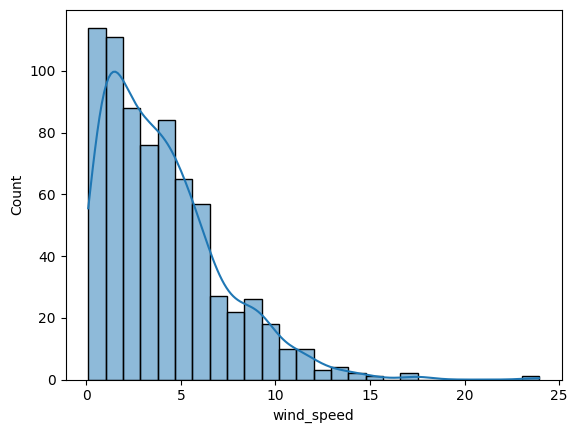

In [9]:
sns.histplot(data = bigfoot, x = "wind_speed", kde = True);

Note that `kde = True` is required to overlay the KDE curve over the actual histogram!

### **(c)**

Now, let's look at some qualitative variables. Write a line of code that produces a visualization that shows the distribution of bigfoot sightings across the variable `season` (example shown below). 

**Hint:** Use `seaborn`'s `sns.countplot` or `matplotlib`'s `plt.bar`.

![](images/season_bar.png)

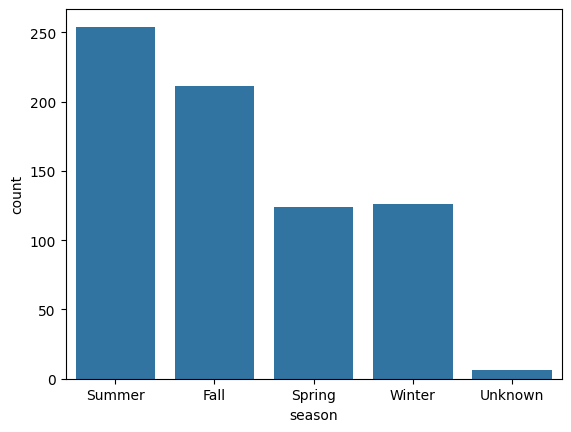

In [14]:
sns.countplot(data = bigfoot, x = "season");

In order to also replicate the colors of the bars, you would need to manually specify them.

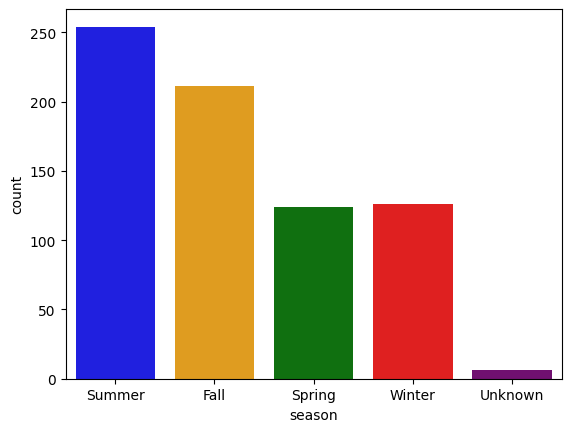

In [19]:
sns.countplot(data = bigfoot, x = "season", palette = ["blue", "orange", "green", "red", "purple"]);

You could have alternatively used Matplotlib!

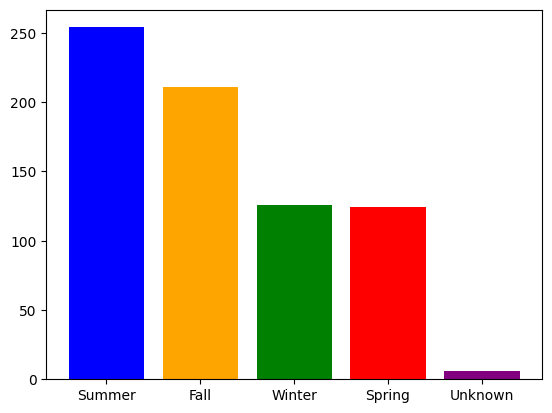

In [21]:
season_counts = bigfoot["season"].value_counts()
plt.bar(season_counts.index, season_counts.values, color = ["blue", "orange", "green", "red", "purple"]);


### **(d)**

Finally, produce a single visualization that showcases how the prevalence of bigfoot sightings at particular combinations of `moon_phase` and `wind_speed` vary across each season.

**Hint**: Think about color as the third information channel in the plot.

![](images/moon_vs_wind.png)

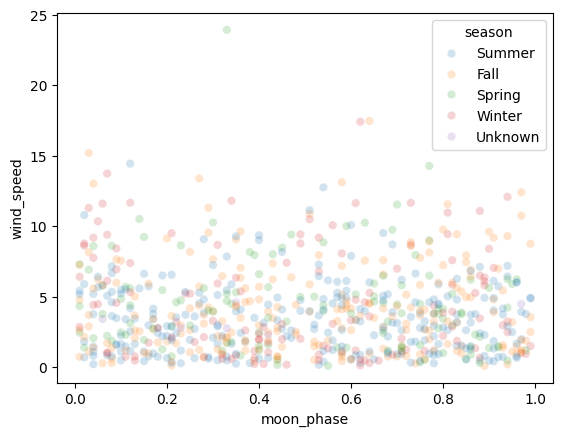

In [25]:
sns.scatterplot(data = bigfoot,
                x = "moon_phase",
                y = "wind_speed",
                hue = "season",
                alpha = 0.2);

Note the two rather unfamiliar arguments:

* **hue** specifies which column of `bigfoot` we want to color the points according to
* **alpha** specifies how transparent the points should be. Higher values of **alpha** lead to more opaque points.

## Kernel Density Estimation (KDE)

Kernel Density Estimation is used to estimate a probability density function (or density curve)
from a set of data. A kernel with a bandwidth parameter α is placed on data observations $x_i$
with $i ∈ \{1, ..., n\}$, and the density estimation is calculated by averaging all kernels. Below,
Gaussian and Boxcar kernel equations are listed:

* Gaussian Kernel: $K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2\pi\alpha^2}}\exp({-\frac{(x-x_i)^2}{2\alpha^2}})$
* Boxcar Kernel: $B_{\alpha}(x, x_i) = \begin{cases} 
      \frac{1}{\alpha} & \text{ if }-\frac{\alpha}{2} \leq x - x_i \leq \frac{\alpha}{2} \\
      0 & \text{ else}
  \end{cases}$

The KDE is calculated as follows: $f_\alpha(x) = \frac{1}{n}\sum_{i = 1}^{n} K_\alpha(x, x_i)$.

### **(a)** 
Draw a KDE plot (by hand is fine) for data points [1, 4, 8, 9] using Gaussian
Kernel and $\alpha = 1$. On the plot show $x$, $x_i$, $\alpha$, and the KDE.

<details>
<summary><b>Answer</b></summary>

With $\alpha = 1$, we get a Gaussian Kernel of $K_{1}(x, x_i) = \frac{1}{\sqrt{2 \pi}} \exp\left(-\frac{(x - x_i)^2}{2} \right)$. 

This kernel is greatest when $x = x_i$, giving us maximum point at 
$$K_{1}(x, x) = \frac{1}{\sqrt{2 \pi}} = 0.3989 \approx 0.4$$

Each individual kernel is a Gaussian centered, respectively, at \texttt{[1, 4, 8, 9]}. Since we have 4 kernels, each with an area of 1, we normalize by dividing each kernel by 4. This gives us a maximum height of $0.1$. We then sum those kernels together to obtain the final KDE plot: 

![KDE](images/kde.png)

</details>

### **(b)** 

We wish to compare the results of KDE using a Gaussian kernel and a boxcar kernel. For
$\alpha > 0$, which of the following statements is true? Choose all that apply.

**A**. Decreasing $\alpha$ for a Gaussian kernel decreases the smoothness of the KDE.

**B**. The Gaussian kernel is always better than the boxcar kernel for KDEs.

**C**. Because the Gaussian kernel is smooth, we can safely use large $\alpha$ values for
kernel density estimation without worrying about the actual distribution of data.

**D**. The area under the boxcar kernel is 1, regardless of the value of $\alpha$.

**E**. None of the above.

<details>
<summary><b>Answer</b></summary>

**Correct options: A, D**

**B** is false because a boxcar kernel can perform better is $\alpha$ is not chosen properly for the Gaussian kernel

**C** is false because an $\alpha$ that is too high risks including too many points in the estimate, resulting in a flatter curve.